In [1]:
import os, sys

PRJ_ROOT = os.environ['PRJ_ROOT']
if f"{PRJ_ROOT}/src" not in sys.path:
    sys.path.append(f"{PRJ_ROOT}/src")

%reload_ext autoreload
%autoreload 2

THIS_DIR = f"{PRJ_ROOT}/notebooks"
os.chdir(THIS_DIR)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from moke_config import create_config
from youtube_stat.lib.file_util import load_yaml_from_file
from youtube_stat.config import Config
from youtube_stat.lib.file_util import load_json_from_file, save_json_to_file

config_dict = load_yaml_from_file(f"{PRJ_ROOT}/config/siro.yml")
config = create_config(Config, config_dict)

In [3]:
from youtube_stat.data.processor import DataProcessor
dp = DataProcessor(config)
df = dp.load_training_data()

In [4]:
words = load_json_from_file(dp.word_index_path)
for w, i in list(words.items()):
    words[f"w{i:03d}"] = w

In [5]:
df.describe()

,view,like,dislike,comment,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,...,w153,w154,w155,w156,w157,w158,w159,w160,w161,w162
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,...,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,134907.075130,3778.709845,74.567358,622.829016,0.002591,0.002591,0.049223,0.064767,0.067358,0.056995,...,0.007772,0.007772,0.007772,0.007772,0.007772,0.007772,0.007772,0.007772,0.007772,0.007772
std,113662.841271,2575.377325,76.894172,487.825072,0.050899,0.050899,0.216614,0.246433,0.250965,0.232134,...,0.087930,0.087930,0.087930,0.087930,0.087930,0.087930,0.087930,0.087930,0.087930,0.087930
min,13897.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67858.500000,2131.250000,31.000000,193.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100994.500000,3491.500000,49.500000,579.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,162861.750000,4692.500000,86.250000,856.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,977923.000000,19829.000000,557.000000,2405.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


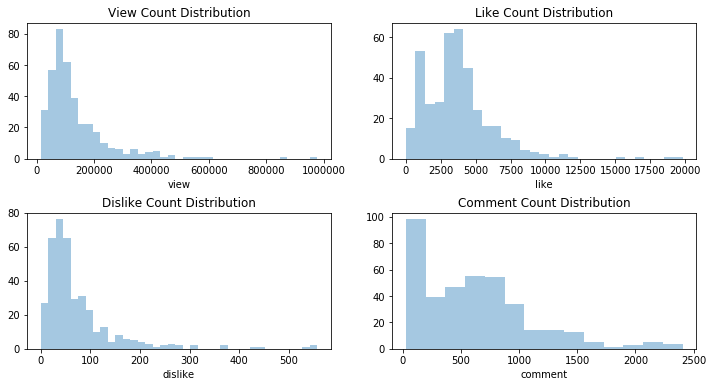

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

sns.distplot(df.view, kde=False, ax=axes[0, 0])
axes[0, 0].set_title("View Count Distribution")

sns.distplot(df.like, kde=False, ax=axes[0, 1])
axes[0, 1].set_title("Like Count Distribution")

sns.distplot(df.dislike, kde=False, ax=axes[1, 0])
axes[1, 0].set_title("Dislike Count Distribution")

sns.distplot(df.comment, kde=False, ax=axes[1, 1])
axes[1, 1].set_title("Comment Count Distribution")

plt.subplots_adjust(hspace=0.4)

Text(0.5,1,'Like/View Rate Distribution')

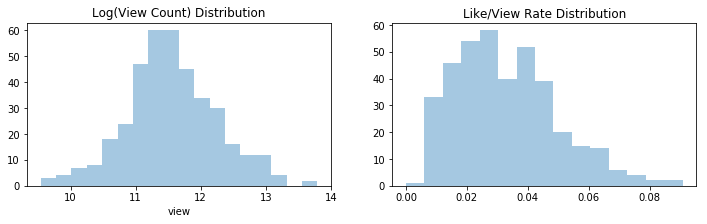

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

sns.distplot(np.log(df.view), kde=False, ax=axes[0])
axes[0].set_title("Log(View Count) Distribution")

sns.distplot(df.like/df.view, kde=False, ax=axes[1])
axes[1].set_title("Like/View Rate Distribution")

In [8]:
import re
import statsmodels.formula.api as smf
import statsmodels.api as sm


x_cols = [x for x in df.columns if re.search(r"^(201|Mon|Tue|Wed|Thr|Fri|Sat|Sun|w)", x)]

df_x = df.loc[:, x_cols]
df_x = sm.add_constant(df_x, prepend=False)

df_y = np.log(df.view)
#df_y = df.view

model = smf.OLS(df_y, df_x, hasconst=True)
result = model.fit()
s = result.summary2()
s

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.460    
Dependent Variable: view             AIC:                698.3665 
Date:               2018-09-06 10:35 BIC:                1390.6381
No. Observations:   386              Log-Likelihood:     -174.18  
Df Model:           174              F-statistic:        2.886    
Df Residuals:       211              Prob (F-statistic): 1.79e-13 
R-squared:          0.704            Scale:              0.26411  
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
2017-06    0.3316     0.5995     0.5532   0.5807   -0.8501    1.5133
2017-07   -0.0924     0.5961    -0.1550   0.8770   -1.2674    1.0826
2017-08    0.6516     0.1494     4.3623   0.0000    0.3572    0.9461
2017-09   -0.0012     0.1552    -0.0074   0.9941   -0.3070    0.3047
2017-10    0.5436     0.1386     3.9217   0.0001    0.2704    0.8169
2017-11    0.0852     0.1582     0.5385   0.5908   -0.2266    0.3970
2017-12    1.0616     0.1604     6.6176   0.0000    0.7454    1.3778
2018-01    1.5294     0.1383    11.0607   0.0000    1.2569    1.8020
2018-02    1.4395     0.1330    10.8243   0.0000    1.1774    1.7017
2018-03    0.9540     0.1309     7.2870   0.0000    0.6959    1.2121
2018-04    0.8516     0.1506     5.6558   0.0000    0.5548    1.1484
2018-05    0.6536     0.1505     4.3427   0.0000    0.3569    0.9503
2018-06    0.6003     0.1533     3.9148   0.0001    0.2980    0.9025
2018-07    0.5556     0.1420     3.9137   0.0001    0.2757    0.8354
2018-08    0.2788     0.1471     1.8954   0.0594   -0.0112    0.5688
Mon        1.3951     0.0916    15.2270   0.0000    1.2145    1.5757
Tue        1.2667     0.0852    14.8704   0.0000    1.0988    1.4346
Wed        1.2742     0.0859    14.8360   0.0000    1.1049    1.4435
Thr        1.2206     0.0860    14.1851   0.0000    1.0510    1.3903
Fri        1.3432     0.0853    15.7392   0.0000    1.1750    1.5114
Sat        1.4952     0.0831    17.9923   0.0000    1.3314    1.6590
Sun        1.4480     0.0905    15.9983   0.0000    1.2696    1.6264
w000       0.1074     0.0849     1.2644   0.2075   -0.0600    0.2749
w001       0.1326     0.1177     1.1264   0.2613   -0.0995    0.3647
w002      -0.1246     0.1442    -0.8643   0.3884   -0.4089    0.1596
w003      -0.2077     0.1599    -1.2984   0.1956   -0.5229    0.1076
w004      -0.3145     0.6920    -0.4546   0.6499   -1.6786    1.0495
w005      -0.3240     0.1994    -1.6250   0.1056   -0.7171    0.0690
w006       0.4585     0.7144     0.6418   0.5217   -0.9498    1.8667
w007       0.2933     0.2320     1.2643   0.2075   -0.1640    0.7507
w008       0.4013     0.2447     1.6401   0.1025   -0.0810    0.8837
w009      -0.0141     0.3177    -0.0445   0.9645   -0.6404    0.6121
w010      -0.2338     0.2167    -1.0788   0.2819   -0.6609    0.1934
w011      -0.0589     0.1260    -0.4676   0.6406   -0.3072    0.1894
w012      -0.0589     0.1260    -0.4676   0.6406   -0.3072    0.1894
w013      -0.0589     0.1260    -0.4676   0.6406   -0.3072    0.1894
w014       0.3486     0.2016     1.7290   0.0853   -0.0488    0.7461
w015      -0.2251     0.2445    -0.9207   0.3582   -0.7070    0.2568
w016       0.2788     0.1931     1.4435   0.1504   -0.1019    0.6595
w017       0.2851     0.2174     1.3113   0.1912   -0.1435    0.7137
w018       0.0573     0.2389     0.2396   0.8108   -0.4137    0.5282
w019      -0.1300     0.2155    -0.6033   0.5469   -0.5549    0.2948
w020      -0.1711     0.4868    -0.3515   0.7256   -1.1306    0.7884
w021       0.0083     0.2337     0.0353   0.9718   -0.4525    0.4690
w022      -0.5381     0.2423    -2.2205   0.0274   -1.0159   -0.0604
w023       0.3412     0.2640     1.2921   0.1977   -0.

In [9]:
coef = s.tables[1]
cf = coef[coef['P>|t|'] < 0.1].loc[:, "Coef."]

wdf = {}
ddf = {}
for k, v in dict(cf).items():
    if k in words:
        wdf[words[k]] = v
    else:
        ddf[k] = v
pd.DataFrame(list(sorted([[k, v] for k, v in wdf.items()], key=lambda x: x[1])))

,0,1
0,動物,-1.008496
1,空間,-0.964933
2,運動会,-0.938445
3,制作,-0.930625
4,みんな,-0.818099
5,悩む,-0.804280
6,台詞,-0.757334
7,モノマネ,-0.744255
8,ボイス,-0.714929
9,誕生,-0.674070


In [11]:
import re
import statsmodels.formula.api as smf


x_cols = [x for x in df.columns if re.search(r"^(201|Mon|Tue|Wed|Thr|Fri|Sat|Sun|w)", x)]

df_x = df.loc[:, x_cols]
df_x = sm.add_constant(df_x, prepend=False)
df_y = df.like / df.view

model = smf.OLS(df_y, df_x, hasconst=True)
result = model.fit()
s = result.summary2()
s

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.749     
Dependent Variable: y                AIC:                -2485.1464
Date:               2018-09-06 10:36 BIC:                -1792.8749
No. Observations:   386              Log-Likelihood:     1417.6    
Df Model:           174              F-statistic:        7.609     
Df Residuals:       211              Prob (F-statistic): 3.92e-41  
R-squared:          0.863            Scale:              6.9177e-05
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
2017-06     -0.0257     0.0097   -2.6505   0.0086   -0.0448   -0.0066
2017-07     -0.0099     0.0096   -1.0300   0.3042   -0.0290    0.0091
2017-08     -0.0108     0.0024   -4.4560   0.0000   -0.0155   -0.0060
2017-09     -0.0079     0.0025   -3.1427   0.0019   -0.0128   -0.0029
2017-10     -0.0107     0.0022   -4.7780   0.0000   -0.0151   -0.0063
2017-11     -0.0065     0.0026   -2.5212   0.0124   -0.0115   -0.0014
2017-12     -0.0108     0.0026   -4.1495   0.0000   -0.0159   -0.0057
2018-01     -0.0011     0.0022   -0.4807   0.6312   -0.0055    0.0033
2018-02     -0.0001     0.0022   -0.0579   0.9539   -0.0044    0.0041
2018-03      0.0068     0.0021    3.2136   0.0015    0.0026    0.0110
2018-04      0.0093     0.0024    3.8321   0.0002    0.0045    0.0141
2018-05      0.0172     0.0024    7.0647   0.0000    0.0124    0.0220
2018-06      0.0208     0.0025    8.3643   0.0000    0.0159    0.0256
2018-07      0.0241     0.0023   10.4975   0.0000    0.0196    0.0286
2018-08      0.0290     0.0024   12.1998   0.0000    0.0244    0.0337
Mon          0.0029     0.0015    1.9453   0.0531   -0.0000    0.0058
Tue          0.0048     0.0014    3.4459   0.0007    0.0020    0.0075
Wed          0.0047     0.0014    3.4078   0.0008    0.0020    0.0075
Thr          0.0050     0.0014    3.5611   0.0005    0.0022    0.0077
Fri          0.0052     0.0014    3.7596   0.0002    0.0025    0.0079
Sat          0.0020     0.0013    1.4823   0.1398   -0.0007    0.0046
Sun         -0.0007     0.0015   -0.4795   0.6321   -0.0036    0.0022
w000        -0.0008     0.0014   -0.5934   0.5535   -0.0035    0.0019
w001        -0.0018     0.0019   -0.9353   0.3507   -0.0055    0.0020
w002        -0.0003     0.0023   -0.1334   0.8940   -0.0049    0.0043
w003        -0.0025     0.0026   -0.9530   0.3417   -0.0076    0.0026
w004        -0.0011     0.0112   -0.0998   0.9206   -0.0232    0.0210
w005        -0.0020     0.0032   -0.6269   0.5314   -0.0084    0.0043
w006         0.0054     0.0116    0.4644   0.6428   -0.0174    0.0282
w007        -0.0035     0.0038   -0.9380   0.3493   -0.0109    0.0039
w008         0.0003     0.0040    0.0698   0.9445   -0.0075    0.0081
w009        -0.0054     0.0051   -1.0417   0.2987   -0.0155    0.0048
w010         0.0041     0.0035    1.1618   0.2466   -0.0028    0.0110
w011        -0.0029     0.0020   -1.4112   0.1596   -0.0069    0.0011
w012        -0.0029     0.0020   -1.4112   0.1596   -0.0069    0.0011
w013        -0.0029     0.0020   -1.4112   0.1596   -0.0069    0.0011
w014        -0.0082     0.0033   -2.5232   0.0124   -0.0147   -0.0018
w015         0.0026     0.0040    0.6558   0.5127   -0.0052    0.0104
w016         0.0041     0.0031    1.3028   0.1941   -0.0021    0.0102
w017        -0.0005     0.0035   -0.1470   0.8833   -0.0075    0.0064
w018        -0.0039     0.0039   -1.0122   0.3126   -0.0115    0.0037
w019        -0.0057     0.0035   -1.6419   0.1021   -0.0126    0.0011
w020         0.0103     0.0079    1.3051   0.1933   -0.0052    0.0258
w021        -0.0001     0.0038   -0.0375   0.9701   -0.0076    0.0073
w022         0.0014     0.0039    0.3640   0.7162   -0.0063    0.00

In [12]:
coef = s.tables[1]
cf = coef[coef['P>|t|'] < 0.1].loc[:, "Coef."]

wdf = {}
ddf = {}
for k, v in dict(cf).items():
    if k in words:
        wdf[words[k]] = v
    else:
        ddf[k] = v

pd.DataFrame(list(sorted([[k, v] for k, v in wdf.items()], key=lambda x: x[1])))

,0,1
0,おまけ,-0.013668
1,挑戦,-0.008234
2,万,0.006324
3,誕生,0.009717
4,ボイス,0.010992
5,リベンジ,0.011103
6,体験,0.011333
7,為,0.011567
8,意味,0.012312
9,記念,0.014438


In [14]:
from youtube_stat.lib.datetime_util import parse_date_str
bdf = dp.load_basic_data()
bdf['month'] = bdf.apply(lambda r: parse_date_str(r.date).strftime("%Y-%m"), axis=1)
bdf['like_rate'] = bdf.like / bdf.view

In [15]:
bdf['month'] = bdf.apply(lambda r: parse_date_str(r.date).strftime("%Y-%m"), axis=1)
bdf['like_rate'] = bdf.like / bdf.view

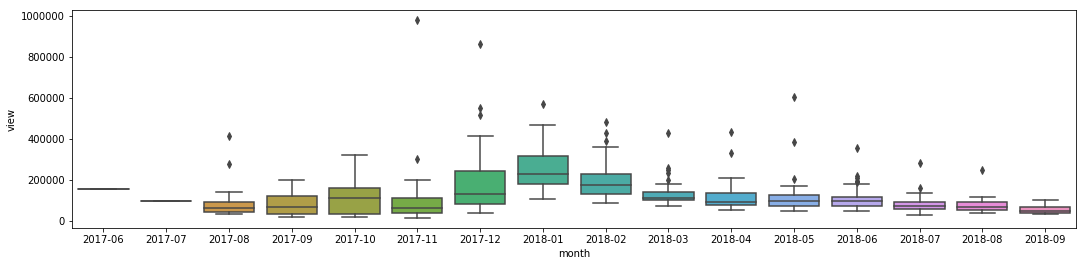

In [16]:
plt.figure(figsize=(18, 4))
sns.boxplot(bdf.month, bdf.view, order=sorted(bdf.month.unique()))

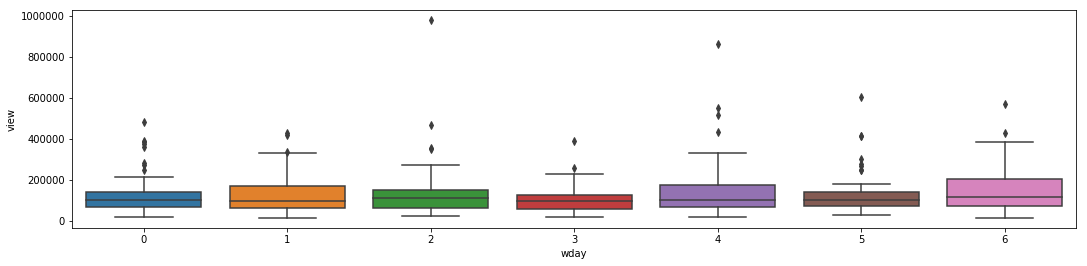

In [17]:
plt.figure(figsize=(18, 4))
sns.boxplot(bdf.wday, bdf.view, order=sorted(bdf.wday.unique()))

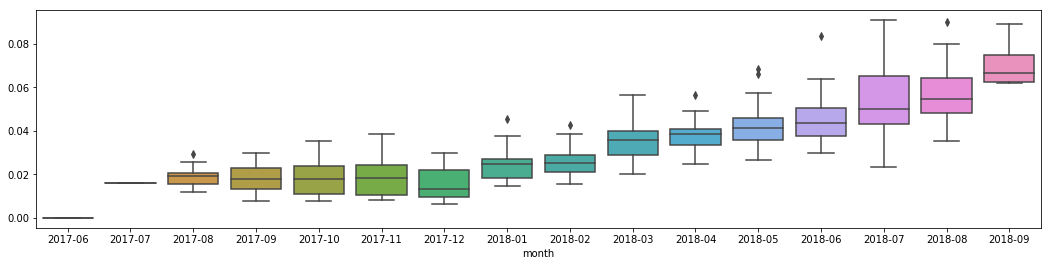

In [18]:
plt.figure(figsize=(18, 4))
sns.boxplot(bdf.month, bdf.like / bdf.view, order=sorted(bdf.month.unique()))